# Robotis Darwin OP 3 with Inverse Kinematics

In this notebook we will try IKPy with the Robotis Darwin OP 3.

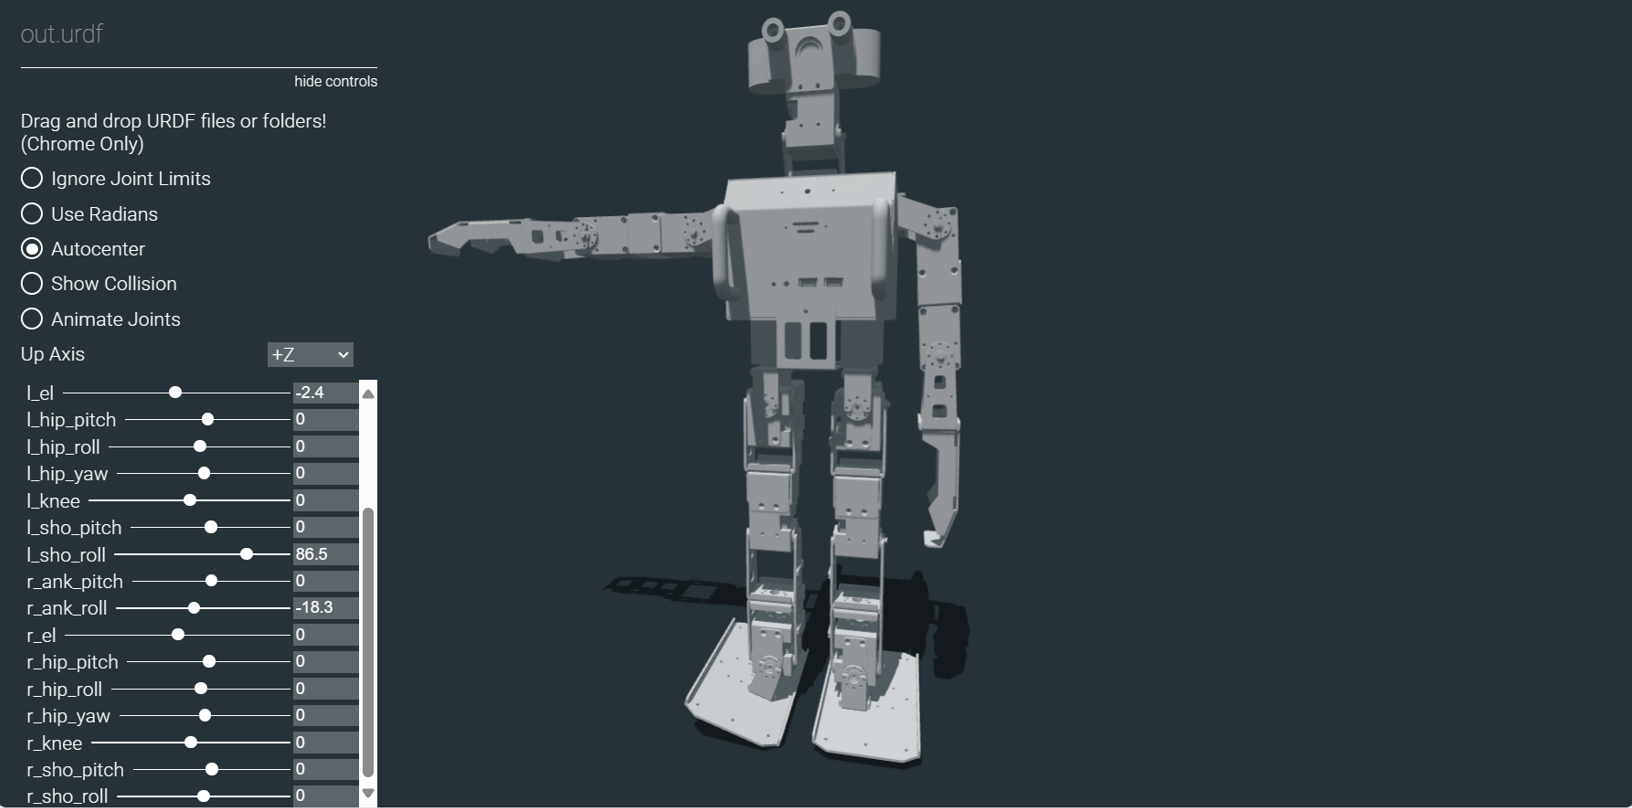
(Note: the picture above is making use [Garrett Johnson's URDF Loader / Viewer](https://github.com/gkjohnson/urdf-loaders))

As part of this tutorial, you will get the following chains:

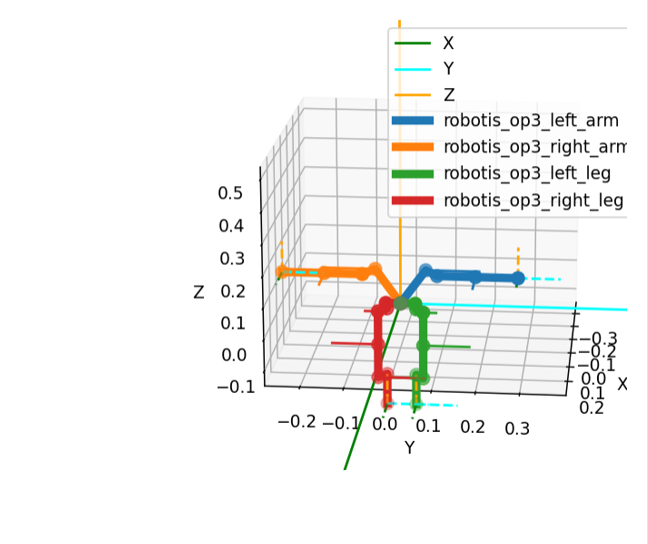

...and then make the arms (end-effectors) move towards a target we choose the position of:

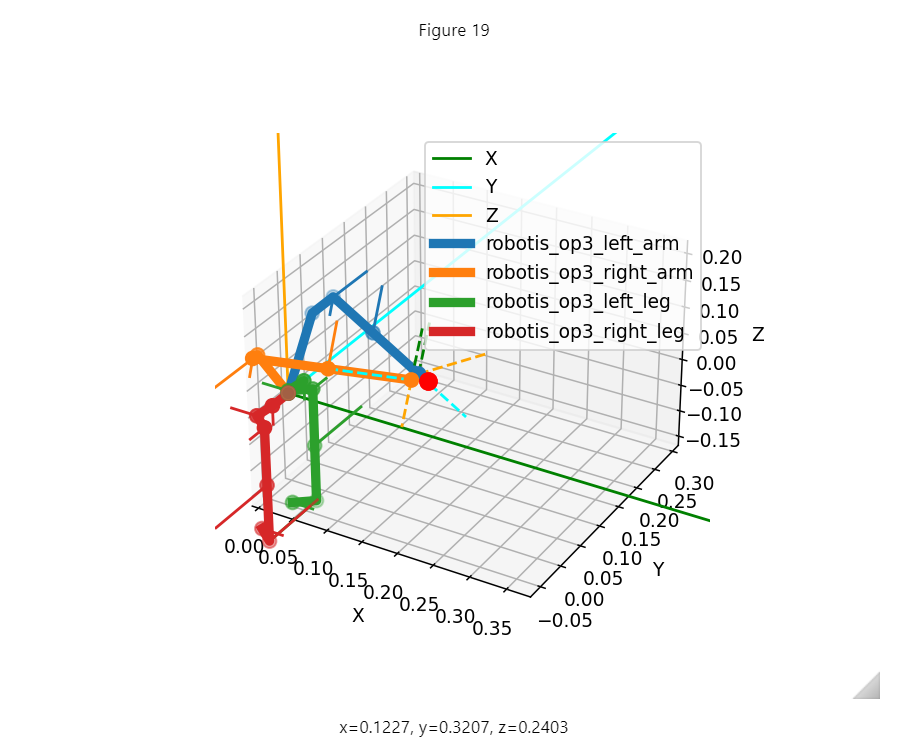

Let's begin shall we!

# Requirements

To get this notebook to work, you will have to install IKPy, and a version >= 3.0.

If you want to use interactive 3D visualisation (which is highly recommended), you must use the `widget` matplotlib backend (you can find this in the code segment below).

In [40]:
# Import the necessary libraries
import numpy as np

from ikpy.chain import Chain
from ikpy.utils import plot


# Optional: Support for 3D plotting in the notebook.
# Feel free to turn this off if you don't need it
%matplotlib widget

 ## Robot Import and Setup

 Once we have imported the necessary libraries, let's import the Robotis Darwin OP 3 chains for each limb, using the pre-generated .JSON chains from our `generate_chains.py` file, found in the resources folder of this repository.

 (Note that the Robotis Darwin OP 3 URDF used for these chains is derived from [this work](https://github.com/ROBOTIS-GIT/ROBOTIS-OP3-Common), licensed under Apache 2.0.)

In [41]:
robotis_op3_left_arm_chain = Chain.from_json_file("../resources/robotis_op3/robotis_op3_left_arm.json")

In [42]:
robotis_op3_right_arm_chain = Chain.from_json_file("../resources/robotis_op3/robotis_op3_right_arm.json")

In [43]:
robotis_op3_left_leg_chain = Chain.from_json_file("../resources/robotis_op3/robotis_op3_left_leg.json")

In [44]:
robotis_op3_right_leg_chain = Chain.from_json_file("../resources/robotis_op3/robotis_op3_right_leg.json")

We can then plot the chains to get a visual indication everything is going right:

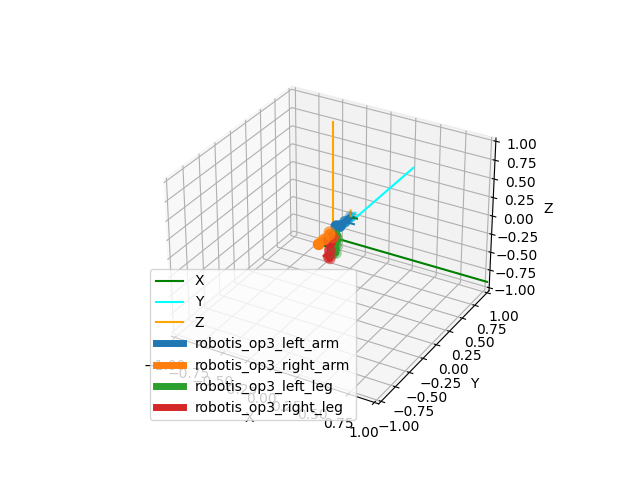

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plot.init_3d_figure()
robotis_op3_left_arm_chain.plot([0] * (len(robotis_op3_left_arm_chain)), ax)
robotis_op3_right_arm_chain.plot([0] * (len(robotis_op3_right_arm_chain)), ax)
robotis_op3_left_leg_chain.plot([0] * (len(robotis_op3_left_leg_chain)), ax)
robotis_op3_right_leg_chain.plot([0] * (len(robotis_op3_right_leg_chain)), ax)
ax.legend()

# Carrying out Inverse Kinematics
Now, let's give some inverse kinematics a go.

We will place a target directly ahead, in the centre in-front of the robot, roughly in the middle for the arms to 'grasp' to, and then run the `inverse_kinematics` function on our chains to get the new position values for each joint in our limb. 

Feel free to modify the target value, or extend this code to make it work for the legs too as a way of increasing your understanding - modifying and playing around with this code will be a good way to get a better grasp of what's going on and how this works.


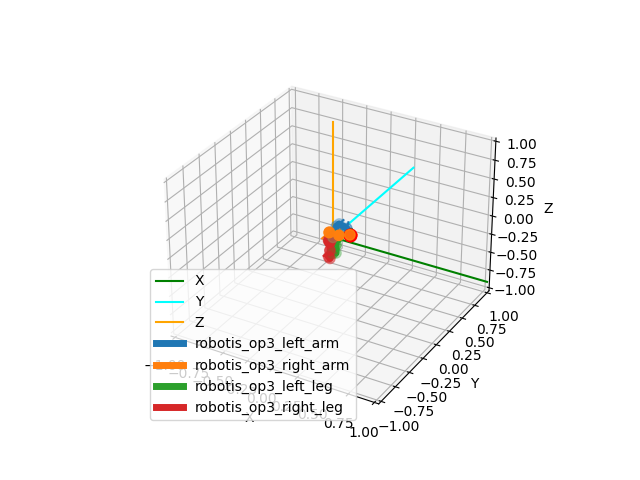

In [50]:
fig, ax = plot.init_3d_figure();

# Place a target directly in front of the robot, roughly in the centre 
target = [0.17, 0, 0.1]

# Carry out the inverse kinematics
ik_left_arm = robotis_op3_left_arm_chain.inverse_kinematics(target)
# Plot to show the result (and prove success!)
robotis_op3_left_arm_chain.plot(ik_left_arm, ax, target=target)

ik_right_arm = robotis_op3_right_arm_chain.inverse_kinematics(target)
robotis_op3_right_arm_chain.plot(ik_right_arm, ax, target=target)

robotis_op3_left_leg_chain.plot([0] * (len(robotis_op3_left_leg_chain)), ax)
robotis_op3_right_leg_chain.plot([0] * (len(robotis_op3_right_leg_chain)), ax)

# Comment out if the graph's key gets in the way.
ax.legend()